1

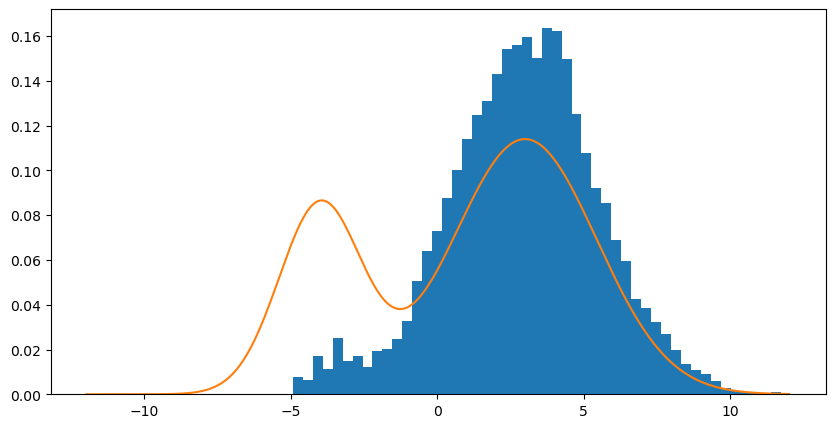

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

def metroplis(start, niter, sigma):
    post = [start]
    current = start    
    for i in range(niter):
        current  = np.asarray(current)
        sigma    = np.asarray(sigma)
        proposed = current + sigma * np.random.randn(*current.shape)

        p = 0.3*norm(-4, np.sqrt(2)).pdf(proposed) + 0.7*norm(3, np.sqrt(6)).pdf(proposed) / (0.3*norm(-4, np.sqrt(2)).pdf(current) + 0.7*norm(3, np.sqrt(6)).pdf(current))
        if np.random.rand() < p:
            current = proposed

        post.append(current)

    return post[0:]  


x = np.linspace(-12, 12, 1000)
y = 0.3 * norm(-4, np.sqrt(2)).pdf(x) + 0.7 * norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(metroplis(2.5, 30000, 0.5), bins = 50, density=True)
plt.plot(x, y)
plt.show()

2

23.5099


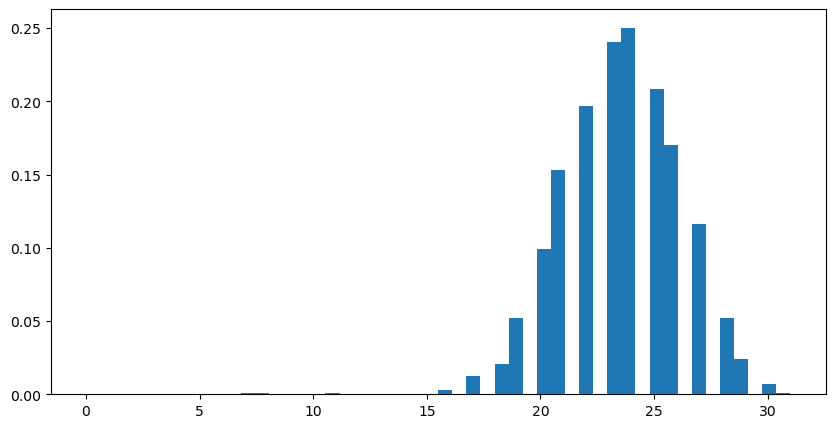

In [2]:
def proposal(current):    
    inds = np.random.choice(10,2)
    current[inds[0]][inds[1]] = 1
    if inds[0] > 0:
        if(current[inds[0]-1][inds[1]] == 1): current[inds[0]][inds[1]] = 0
    if inds[0] < 9:
        if(current[inds[0]+1][inds[1]] == 1): current[inds[0]][inds[1]] = 0
    if inds[1] > 0:
        if(current[inds[0]][inds[1]-1] == 1): current[inds[0]][inds[1]] = 0
    if inds[1] < 9:
        if(current[inds[0]][inds[1]+1] == 1): current[inds[0]][inds[1]] = 0
    return current

def metroplis(start, N):
    current = start
    m = []
    for i in range(N):
        sum = current.sum()
        inds = np.random.choice(10,2)
        proposed = proposal(current)
        
        p = proposed.sum()
        
        if sum > 0: p = p / sum

        if np.random.rand() > p: current = proposed
        else:                    current[inds[0]][inds[1]] = 0;

        m.append(int(np.sum(current)))

    return m[0:] 


N = 10000
E = 0
m = metroplis(np.zeros((10,10)), N)
E = np.mean(m)
print(E)
fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(m, bins = 50, density=True)
plt.show()